In [94]:
import glob, os, re, json
import pandas as pd
%reload_ext autoreload
%autoreload 2
ROOTDIR = "/Users/felix/Dropbox/work/supreme-broccoli/"
DATADIR = os.path.join(ROOTDIR, 'twitterdata')

def read_json_tweets(path=DATADIR):
    dfs = []
    files = glob.glob(os.path.join(DATADIR, "**", "*.json"), recursive=True)
    for file in files:
        json_lines = open(os.path.join(file)).readlines()
        df = pd.DataFrame([json.loads(line) for line in json_lines])
        df['manifestolabel_keywords'] = file.split('/')[-2]
        df['date'] = pd.to_datetime(df['formatted_date']).dt.tz_localize(None)
        dfs.append(df)        
    return pd.concat(dfs).reset_index(drop=True)

def read_csv_tweets(path=DATADIR):
    files = glob.glob(os.path.join(DATADIR,"**", "*.csv"), recursive=True)
    dfs = []
    for file in files:
        df = pd.read_csv(open(file,'rU'), encoding='utf8', engine='c' ,
                          error_bad_lines=False, 
                          parse_dates=True,
                          infer_datetime_format=True)
    
        df['manifestolabel_keywords'] = file.split('/')[-2]
        df['date'] = pd.to_datetime(df['formatted_date']).dt.tz_localize(None)
        dfs.append(df)
    return pd.concat(dfs).reset_index(drop=True)

df = pd.concat([read_json_tweets(), read_csv_tweets()])
df['before'] = df['date'] < pd.Timestamp(2020,3,15)
df['after'] = df['date'] > pd.Timestamp(2020,3,15)

df


<ipython-input-94-cf133ebcde99>:23: DeprecationWarning: 'U' mode is deprecated
  df = pd.read_csv(open(file,'rU'), encoding='utf8', engine='c' ,


,username,to,text,retweets,favorites,replies,id,permalink,author_id,formatted_date,hashtags,mentions,geo,urls,url_text,manifestolabel_keywords,date,before,after
0,WISSENAgentur,None,Rede über Deine Vision und Ziele! Als viertes ...,0.0,0.0,0.0,1223029926003126273,https://twitter.com/WISSENAgentur/status/12230...,7.892181e+07,Thu Jan 30 23:47:11 +0000 2020,#Prinzip #Unternehmer #Manager #Mitarbeiter #V...,,,https://www.wissen-agentur.de/w-zzb05.html,,internationalism -,2020-01-30 23:47:11,True,False
1,BarrowsMikeOtto,mrdanwalker,Ruff(us) Brevett Lassie Diarra Graham FENTON F...,0.0,16.0,3.0,1223025959869218816,https://twitter.com/BarrowsMikeOtto/status/122...,7.097834e+07,Thu Jan 30 23:31:26 +0000 2020,,,,,,internationalism -,2020-01-30 23:31:26,True,False
2,liam_witte,None,Mal ernsthaft diese Tweets in in denen ständig...,0.0,1.0,0.0,1223024892263784449,https://twitter.com/liam_witte/status/12230248...,9.048647e+17,Thu Jan 30 23:27:11 +0000 2020,,,,,,internationalism -,2020-01-30 23:27:11,True,False
3,Sara60603304,ivanaastrosol,Ich möchte gerne sie haben recht,0.0,1.0,0.0,1223022275034742789,https://twitter.com/Sara60603304/status/122302...,9.855458e+17,Thu Jan 30 23:16:47 +0000 2020,,,,,,internationalism -,2020-01-30 23:16:47,True,False
4,katha_krentz,MayrhoferMarina,"Sehr gerne - ich freue mich, wenn es hilft",0.0,1.0,0.0,1223015670545371136,https://twitter.com/katha_krentz/status/122301...,3.705631e+08,Thu Jan 30 22:50:33 +0000 2020,,,,,,internationalism -,2020-01-30 22:50:33,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267797,Helvetistani,Rassenwahn_Paul,Ich verzichte seit vor dem Lockdown auf sozial...,0.0,1.0,0.0,1.24523e+18,https://twitter.com/Helvetistani/status/124522...,5.356522e+08,Wed Apr 01 05:53:42 +0000 2020,NaN,NaN,NaN,NaN,NaN,economic planning +,2020-04-01 05:53:42,False,True
267798,Motivationswerk,NaN,Einige von uns nutzen die soziale Distanzierun...,0.0,0.0,0.0,1.24523e+18,https://twitter.com/Motivationswerk/status/124...,5.534314e+08,Wed Apr 01 05:42:51 +0000 2020,NaN,NaN,NaN,https://www.instagram.com/p/B-bUq4lJdjU/?igshi...,NaN,economic planning +,2020-04-01 05:42:51,False,True
267799,BenjaminWKNFSS,M_Adenia,"Na, weil andere Firmen, die im Prinzip das sel...",0.0,0.0,1.0,1.24521e+18,https://twitter.com/BenjaminWKNFSS/status/1245...,4.516716e+07,Wed Apr 01 05:02:20 +0000 2020,NaN,NaN,NaN,NaN,NaN,economic planning +,2020-04-01 05:02:20,False,True
267800,rbb24,NaN,Guten Morgen! Heute meldet das Soziale-Medien-...,3.0,29.0,3.0,1.24521e+18,https://twitter.com/rbb24/status/1245213162690...,1.620251e+09,Wed Apr 01 04:55:27 +0000 2020,#Berlin #wirbleibenzuhause #wirbleibenzuhause,NaN,NaN,NaN,NaN,economic planning +,2020-04-01 04:55:27,False,True


In [52]:
df.columns

Index(['username', 'to', 'text', 'retweets', 'favorites', 'replies', 'id',
       'permalink', 'author_id', 'formatted_date', 'hashtags', 'mentions',
       'geo', 'urls', 'url_text', 'manifestolabel_keywords', 'date', 'before',
       'after'],
      dtype='object')

In [53]:
(df.loc[df['after'],'manifestolabel_keywords'].value_counts() / df.loc[df['before'],'manifestolabel_keywords'].value_counts()).sort_values()

social justice +          0.643074
social harmony +          0.695963
infrastructure +          0.709091
national way of life -    0.728847
democracy +               0.756390
incentives +              0.764957
agriculture +             0.814889
environmentalism +        0.871649
marxist analysis +        0.872155
multiculturalism -        0.881961
military +                0.883702
europe -                  0.905990
culture +                 0.911443
anti-imperialism +        0.913744
anti-growth economy +     0.951239
military -                0.976482
national way of life +    0.985299
economic goals            1.004239
economic planning +       1.015709
centralism +              1.016418
nationalization +         1.029450
foreign special -         1.046614
internationalism -        1.046726
welfare -                 1.062243
decentralism +            1.064946
constitution +            1.079623
traditional morality -    1.079909
market regulation +       1.083032
constitution -      

In [95]:
from classifier import score_texts

In [96]:
df['text'] = df['text'].fillna('')
df_scored = score_texts(df)

/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimato

In [97]:
df_scored

,username,to,text,retweets,favorites,replies,id,permalink,author_id,formatted_date,...,manifestolabel_keywords,date,before,after,domain_proba,domain,rightleft_proba,rightleft,manifestolabel_proba,manifestolabel
0,WISSENAgentur,None,Rede über Deine Vision und Ziele! Als viertes ...,0.0,0.0,0.0,1223029926003126273,https://twitter.com/WISSENAgentur/status/12230...,7.892181e+07,Thu Jan 30 23:47:11 +0000 2020,...,internationalism -,2020-01-30 23:47:11,True,False,0.271202,Political System,0.514821,left,0.077626,social justice +
1,BarrowsMikeOtto,mrdanwalker,Ruff(us) Brevett Lassie Diarra Graham FENTON F...,0.0,16.0,3.0,1223025959869218816,https://twitter.com/BarrowsMikeOtto/status/122...,7.097834e+07,Thu Jan 30 23:31:26 +0000 2020,...,internationalism -,2020-01-30 23:31:26,True,False,0.373017,Economy,0.849772,left,0.089699,environmentalism +
2,liam_witte,None,Mal ernsthaft diese Tweets in in denen ständig...,0.0,1.0,0.0,1223024892263784449,https://twitter.com/liam_witte/status/12230248...,9.048647e+17,Thu Jan 30 23:27:11 +0000 2020,...,internationalism -,2020-01-30 23:27:11,True,False,0.442919,Welfare and Quality of Life,0.676427,right,0.320030,social justice +
3,Sara60603304,ivanaastrosol,Ich möchte gerne sie haben recht,0.0,1.0,0.0,1223022275034742789,https://twitter.com/Sara60603304/status/122302...,9.855458e+17,Thu Jan 30 23:16:47 +0000 2020,...,internationalism -,2020-01-30 23:16:47,True,False,0.223764,Welfare and Quality of Life,0.587666,right,0.091552,freedom/human rights +
4,katha_krentz,MayrhoferMarina,"Sehr gerne - ich freue mich, wenn es hilft",0.0,1.0,0.0,1223015670545371136,https://twitter.com/katha_krentz/status/122301...,3.705631e+08,Thu Jan 30 22:50:33 +0000 2020,...,internationalism -,2020-01-30 22:50:33,True,False,0.440530,Welfare and Quality of Life,0.579911,right,0.129861,social justice +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267797,Helvetistani,Rassenwahn_Paul,Ich verzichte seit vor dem Lockdown auf sozial...,0.0,1.0,0.0,1.24523e+18,https://twitter.com/Helvetistani/status/124522...,5.356522e+08,Wed Apr 01 05:53:42 +0000 2020,...,economic planning +,2020-04-01 05:53:42,False,True,0.509028,Welfare and Quality of Life,0.740963,left,0.164305,social justice +
267798,Motivationswerk,NaN,Einige von uns nutzen die soziale Distanzierun...,0.0,0.0,0.0,1.24523e+18,https://twitter.com/Motivationswerk/status/124...,5.534314e+08,Wed Apr 01 05:42:51 +0000 2020,...,economic planning +,2020-04-01 05:42:51,False,True,0.460645,Welfare and Quality of Life,0.679273,left,0.130694,social justice +
267799,BenjaminWKNFSS,M_Adenia,"Na, weil andere Firmen, die im Prinzip das sel...",0.0,0.0,1.0,1.24521e+18,https://twitter.com/BenjaminWKNFSS/status/1245...,4.516716e+07,Wed Apr 01 05:02:20 +0000 2020,...,economic planning +,2020-04-01 05:02:20,False,True,0.462210,Welfare and Quality of Life,0.520731,left,0.244139,social justice +
267800,rbb24,NaN,Guten Morgen! Heute meldet das Soziale-Medien-...,3.0,29.0,3.0,1.24521e+18,https://twitter.com/rbb24/status/1245213162690...,1.620251e+09,Wed Apr 01 04:55:27 +0000 2020,...,economic planning +,2020-04-01 04:55:27,False,True,0.650300,Welfare and Quality of Life,0.584657,left,0.116098,political authority +


In [98]:
df_scored.to_csv('tweets_with_urls.csv',index=False)

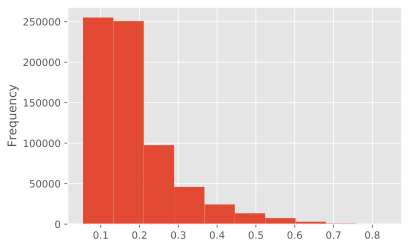

In [101]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['manifestolabel_proba'].plot.hist()

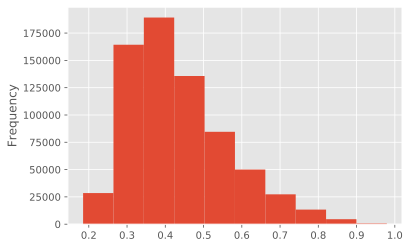

In [102]:
df['domain_proba'].plot.hist()

<Figure size 360x1080 with 0 Axes>

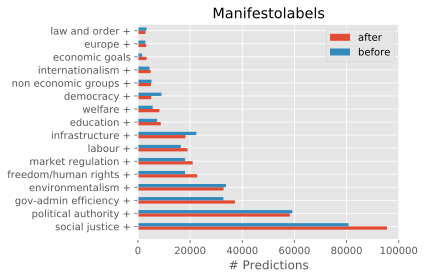

In [107]:
plt.figure(figsize=[5,15]);
pd.DataFrame(
    [df.loc[df['after'],'manifestolabel'].value_counts(), 
     df.loc[df['before'],'manifestolabel'].value_counts()],
    index=['after','before']).T.plot.barh()

plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after.pdf')

<Figure size 360x1080 with 0 Axes>

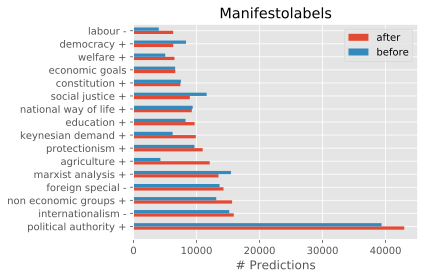

In [108]:
plt.figure(figsize=[5,15]);
pd.DataFrame(
    [df.loc[df['after'],'manifestolabel_keywords'].value_counts(), 
     df.loc[df['before'],'manifestolabel_keywords'].value_counts()],
    index=['after','before']).T.plot.barh()

plt.ylim([-1,15.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after_keywords.pdf')

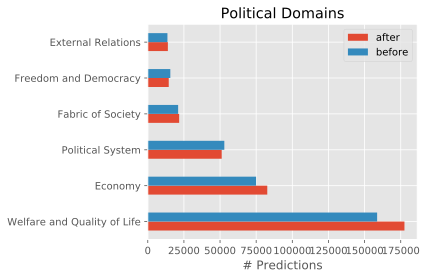

In [104]:
pd.DataFrame(
    [df.loc[df['after'],'domain'].value_counts(), 
     df.loc[df['before'],'domain'].value_counts()],
    index=['after','before']).T.plot.barh()
plt.title('Political Domains')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('domains_before_after.pdf')

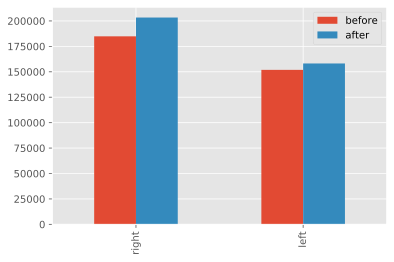

In [105]:
pd.DataFrame(
    [df.loc[df['before'],'rightleft'].value_counts(), 
     df.loc[df['after'],'rightleft'].value_counts()],
    index=['before','after']).T.plot.bar()


In [72]:
from tweets import chunked_iterable
for chunk in range(0,200,10):
    print(chunk)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [65]:
df_scored.drop(['formatted_date', 'urls', 'url_text'],axis=1).to_csv('tweets.csv')

In [79]:
from bs4 import BeautifulSoup
import requests
 
root_url = "https://www.bundestag.de"
url = "https://www.bundestag.de/ajax/filterlist/de/services/opendata/543410-543410/h_49f0d94cb26682ff1e9428b6de471a5b?limit=10&noFilterSet=true&offset="
 
for offset in range(0,300,10):
    protocol_list = requests.get(url + f"{offset}").text
 
    # Passing the source code to BeautifulSoup to create a BeautifulSoup object for it.
    soup = BeautifulSoup(data, 'lxml')

    # Extracting all the <a> tags into a list.
    tags = soup.find_all('a')

    for link in soup.find_all('a'):
        if link.get('href').endswith('.xml'):
            xml_response = requests.get(root_url + link.get('href'))
            open(os.path.join('bundestagsprotokolle', f'{offset}-' + link.get('href').split('/')[-1]), 'w').write(xml_response.text)


In [81]:
ss = BeautifulSoup(open('bundestagsprotokolle/290-19058-data.xml').read())

In [84]:
ss.find_all('ivz-eintrag')

312

In [87]:
ss.get()

<html><body><p>﻿<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet href="dbtplenarprotokoll.css" type="text/css" charset="UTF-8"?>
<!DOCTYPE dbtplenarprotokoll SYSTEM "dbtplenarprotokoll.dtd">

<dbtplenarprotokoll herstellung="Satz: Satzweiss.com Print, Web, Software GmbH, Mainzer Straße 116, 66121 Saarbrücken, www.satzweiss.com, Druck: Printsystem GmbH, Schafwäsche 1-3, 71296 Heimsheim, www.printsystem.de" sitzung-datum="18.10.2018" sitzung-ende-uhrzeit="00:42" sitzung-naechste-datum="19.10.2018" sitzung-nr="58" sitzung-start-uhrzeit="09:00" start-seitennr="6321" vertrieb="Bundesanzeiger Verlagsgesellschaft mbH, Postfach 1 0 05 34, 50445 Köln, Telefon (02 21) 97 66 83 40, Fax (02 21) 97 66 83 44, www.betrifft-gesetze.de" wahlperiode="19">
<vorspann>
<kopfdaten>
<plenarprotokoll-nummer>Plenarprotokoll <wahlperiode>19</wahlperiode>/<sitzungsnr>58</sitzungsnr></plenarprotokoll-nummer>
<herausgeber>Deutscher Bundestag</herausgeber>
<berichtart>Stenografischer Bericht</berichtart>
<si

In [93]:
ss.find('plenarprotokoll-nummer').find('wahlperiode').getText()
ss.find('plenarprotokoll-nummer').find('wahlperiode').getText()

'19'

In [100]:
ss.find_all('rede')[0].find_all('kommentar')

[<kommentar>(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD und der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD und der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)<a id="S6324" name="S6324" typ="druckseitennummer"></a></kommentar>,
 <kommentar>(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD und der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD und der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der SPD und der CDU/CSU)</kommentar>,
 <kommentar>(Beifall bei der AfD)</kommentar>]

In [109]:
ss.find_all('rede')[0]

<rede id="ID195800100">
<p klasse="redner"><redner id="999990071"><name><titel>Dr.</titel><vorname>Franziska</vorname><nachname>Giffey</nachname><rolle><rolle_lang>Bundesministerin für Familie, Senioren, Frauen und Jugend</rolle_lang><rolle_kurz>Bundesministerin BMFSFJ</rolle_kurz></rolle></name></redner>Dr. Franziska Giffey, Bundesministerin für Familie, Senioren, Frauen und Jugend:</p>
<p klasse="J_1">Guten Morgen! Sehr geehrter Herr Präsident! Sehr geehrte Damen und Herren Abgeordnete! Heute ist ein guter Tag für die Kitas und die Kindertagespflege in Deutschland. Mit dem, was wir auf den Weg bringen, haben wir einen Meilenstein erreicht. Nach vierjähriger Vorbereitung, Planung, vielen Gesprächen mit Praktikern, mit den Ländern, den Kommunen, Verbänden und Trägern können wir mit dem Gute-Kita-Gesetz in das parlamentarische Verfahren eintreten. Morgen geht es im Bundesrat weiter.</p>
<p klasse="J">Es ist eines der größten Vorhaben der Bundesregierung in dieser Legislatur. Mit diesem 